# Logistic and Softmax Classifiers


In this TP you have to implement two classifiers, the logistic who classify between two classes and the softmax who extends to many classes.

You have the skeleton code and only need to write a few lines of code. What is important in this TP is not your code but your understanding of the problem. That's why we ask you to write and derive all the formulas on your report before implementing them. We will be vigilant regarding the correspondence of formulas and code.


Here is a summary of what you will have to do :
- implement a fully-vectorized **loss function**
- **check your implementation** with the tests given
- use a validation set to **tune the learning rate and regularization** strength
- **optimize** the loss function with **SGD**
- **visualize** the final learned weights

**LOOPS ARE NOT ALLOWED**. You must be able to write all the code you are asked for without loops. 

## Logistic regression


In [18]:
# Run some setup code for this notebook.

import random
import numpy as np
from data_utils import load_IRIS, load_CIFAR10
import matplotlib.pyplot as plt

# make figures appear inline
%matplotlib inline

# notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will load two classes of the Cifar10 dataset. We load only 2 classes because we start by implementing the logistic classifier.

Clear previously loaded data.
Visualizing some samples


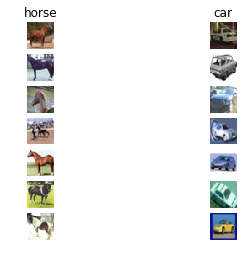

Train data shape:  (9000, 3073)
Train labels shape:  (9000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (2000, 3073)
Test labels shape:  (2000,)


In [19]:
# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# load 2 classes
cifar10_dir = 'datasets/cifar-10-batches-py'
classes=['horse', 'car']
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir, classes=['horse', 'car'])

# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
print("Visualizing some samples")
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


# choising parameters for subsampling
num_training = 9000
num_validation = 1000

# subsample the data
mask = list(range(num_training, num_training + num_validation))
X_val = X_train[mask]
y_val = y_train[mask]
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

# Normalize the data: subtract the mean image and divide by the std
mean_image = np.mean(X_train, axis = 0)
std_image = np.std(X_train, axis = 0)
X_train -= mean_image
X_train /= std_image
X_val -= mean_image
X_val /= std_image
X_test -= mean_image
X_test /= std_image

# add bias dimension and transform into columns
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


num_dim = X_train.shape[1]

# Printing dimensions
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

First, you need to implement the computaion of scores ! Be sure to put the formulas on the report first !

In [20]:
# First implement the logistic loss function.
# Open the file logistic_regression.py and implement the
# scores in loss method.
from logistic_regression import Logistic

dim = X_train.shape[1]
logistic_regression = Logistic(random_seed=13)
logistic_regression.W = 0.001 * np.random.randn(dim, 1)
scores = logistic_regression.loss(X_train)

if scores is None:
    print("You have to implement scores first.")
else:
    if (np.sum(scores) - 4502.3308363) < 1e-7:
        print("Great! Your implementation of scores seems good !")
    else:
        print("Bad news! Your implementation of scores seems wrong !")

Great! Your implementation of scores seems good !


Then implement the loss part of the loss function ! Be sure to put the formulas on the report first !

In [21]:
# First implement the logistic loss function.
# Open the file logistic_regression.py and implement the
# loss in loss method.
from logistic_regression import Logistic

dim = X_train.shape[1]
logistic_regression = Logistic(random_seed=13)
logistic_regression.W = 0.001 * np.random.randn(dim, 1)
loss, _ = logistic_regression.loss(X_train, y_train, 0.0)

if loss is None:
    print("You have to implement loss first.")
else:
    if np.abs(loss - 0.69346228) < 1e-7:
        print("Great! Your implementation of the loss seems good !")
    else:
        print("Bad news! Your implementation of  the loss seems wrong !")

Great! Your implementation of the loss seems good !


Finally, implement the computation of the gradients in loss function ! Be sure to put the formulas on the report first !

In [22]:
# First implement the logistic loss function.
# Open the file logistic_regression.py and implement the
# grad part in loss method.
from logistic_regression import Logistic

dim = X_train.shape[1]
logistic_regression = Logistic(random_seed=13)
logistic_regression.W = 0.001 * np.random.randn(dim, 1)
_, grad = logistic_regression.loss(X_train, y_train, 0.0)

if not np.sum(grad):
    print("You have to implement the gradients first.")
else:
    if np.abs(np.sum(grad) - 28.4035320094) < 1e-7:
        print("Great! Your implementation of gradients seems good !")
    else:
        print("Bad news! Your implementation of gradients seems wrong !")

Great! Your implementation of gradients seems good !


Before start playing, we need to implement the prediction method of the classifier. Implement it here:

In [23]:
# Open the file logistic_regression.py and implement the
# predict() method.
from logistic_regression import Logistic

dim = X_train.shape[1]
logistic_regression = Logistic(random_seed=13)
logistic_regression.W = 0.001 * np.random.randn(dim, 1)
y_pred = logistic_regression.predict(X_train)

if not np.sum(y_pred):
    print("You have to implement prediction first.")
else:
    if np.abs(np.sum(y_pred) - 4718.0) < 1e-7:
        print("Great! Your implementation of prediction seems good !")
    else:
        print("Bad news! Your implementation of prediction seems wrong !")

Great! Your implementation of prediction seems good !


We can now use validation to tune the hyperparameters.

lr = 1e-06, reg = 0.0001
	 -> train acc = 0.666, val acc = 0.650
lr = 1e-06, reg = 0.01
	 -> train acc = 0.666, val acc = 0.650
lr = 1e-06, reg = 0
	 -> train acc = 0.666, val acc = 0.650
lr = 1e-06, reg = 100.0
	 -> train acc = 0.676, val acc = 0.671
lr = 1e-06, reg = 10000.0
	 -> train acc = 0.734, val acc = 0.719
lr = 1e-07, reg = 0.0001
	 -> train acc = 0.442, val acc = 0.444
lr = 1e-07, reg = 0.01
	 -> train acc = 0.442, val acc = 0.444
lr = 1e-07, reg = 0
	 -> train acc = 0.442, val acc = 0.444
lr = 1e-07, reg = 100.0
	 -> train acc = 0.443, val acc = 0.447
lr = 1e-07, reg = 10000.0
	 -> train acc = 0.613, val acc = 0.607
lr = 1e-08, reg = 0.0001
	 -> train acc = 0.405, val acc = 0.421
lr = 1e-08, reg = 0.01
	 -> train acc = 0.405, val acc = 0.421
lr = 1e-08, reg = 0
	 -> train acc = 0.405, val acc = 0.421
lr = 1e-08, reg = 100.0
	 -> train acc = 0.405, val acc = 0.421
lr = 1e-08, reg = 10000.0
	 -> train acc = 0.406, val acc = 0.423
best validation accuracy achieved during cross

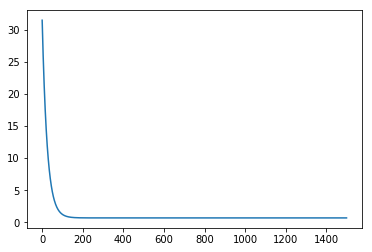

In [24]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths;
from logistic_regression import Logistic
import copy


# to save loss of best model
best_hist = []
# to save accuracy on validation set of best model
best_val = -1
# to save best model
best_logistic = None

learning_rates = [1e-6, 1e-7, 1e-8]
regularization_strengths = [1e-4, 1e-2, 0, 1e2, 1e4]
# number of iterations to train
num_iters=1500
# if true display informations about training
verbose = True

for lr in learning_rates:
    for reg in regularization_strengths:
        print("lr = {}, reg = {}".format(lr, reg))
        model = Logistic(random_seed=13)
        ################################################################################
        # TODO:                                                                        #
        # Write code that chooses the best hyperparameters by tuning on the validation #
        # set. For each combination of hyperparameters, train a model on the           #
        # training set, compute its accuracy on the training and validation sets, and  #
        # store the best validation accuracy in best_val and the model object that     #
        # achieves this accuracy in best_logistc.                                      #
        #                                                                              #
        # Hint: You should use a small value for num_iters as you develop your         #
        # validation code so that the model don't take much time to train; once you are#
        # confident that your validation code works, you should rerun the validation   #
        # code with a larger value for num_iters, lets say 1500.                       #
        #                                                                              #
        # To copy the model use best_logistic = copy.deepcopy(model)                   #
        ################################################################################
        loss, _ = model.train(X_train, y_train, lr, reg, num_iters)
        
        y_pred_train = model.predict(X_train)
        accuracy_train = np.mean(y_train == y_pred_train)
        
        y_pred_validation = model.predict(X_val)
        accuracy_validation = np.mean(y_pred_validation == y_val)
        
        if (accuracy_validation > best_val):
            best_val = accuracy_validation
            best_hist = loss
            best_logistic = copy.deepcopy(model)
        
        ################################################################################
        #                              END OF YOUR CODE                                #
        ################################################################################
        print("\r\t -> train acc = {:.3f}, val acc = {:.3f}".format(accuracy_train, accuracy_validation))


print('best validation accuracy achieved during cross-validation: {:.3f}'.format(best_val))
plt.plot(best_hist)
plt.show()

Now that we have the best model, we can test the accuracy on test set.

In [25]:
# evaluate on test set
# Evaluate the best softmax on test set
y_test_pred = best_logistic.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('Logistic on raw pixels final test set accuracy: {:.3f}'.format(test_accuracy))

Logistic on raw pixels final test set accuracy: 0.735


And finally visualizy the weights.

Text(0.5, 1.0, 'weights')

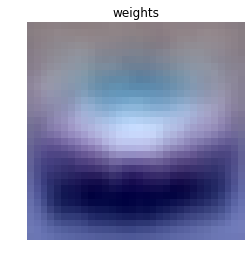

In [26]:
# Visualize the learned weights for each class
w = best_logistic.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 1)

w_min, w_max = np.min(w), np.max(w)


# Rescale the weights to be between 0 and 255
wimg = 255.0 * (w[:, :, :, 0].squeeze() - w_min) / (w_max - w_min)
plt.imshow(wimg.astype('uint8'))
plt.axis('off')
plt.title('weights')

## Softmax clasifier

We ask you to extend here your classifier to many classes. We reload again the data with all the classes.

Clear previously loaded data.
Visualizing some samples


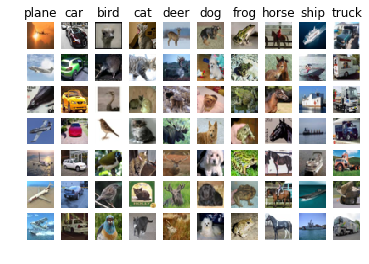

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (10000, 3073)
Test labels shape:  (10000,)


In [27]:
# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# load 2 classes
cifar10_dir = 'datasets/cifar-10-batches-py'
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
print("Visualizing some samples")
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


# choising parameters for subsampling
num_training = 49000
num_validation = 1000

# subsample the data
mask = list(range(num_training, num_training + num_validation))
X_val = X_train[mask]
y_val = y_train[mask]
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

# Normalize the data: subtract the mean image and divide by the std
mean_image = np.mean(X_train, axis = 0)
std_image = np.std(X_train, axis = 0)
X_train -= mean_image
#X_train /= std_image
X_val -= mean_image
#X_val /= std_image
X_test -= mean_image
#X_test /= std_image

# add bias dimension and transform into columns
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


num_dim = X_train.shape[1]

# Printing dimensions
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

First, you need to implement the computaion of scores ! Be sure to put the formulas on the report first !

In [28]:
# First implement the logistic loss function.
# Open the file logistic.py and implement the
# scores in loss method.
from softmax_classifier import Softmax

dim = X_train.shape[1]
model = Softmax(random_seed=13)
model.W = 0.001 * np.random.randn(dim, 10)
scores = model.loss(X_train)

if scores is None:
    print("You have to implement scores first.")
else:
    if (np.sum(scores[:, 0]) - 4897.34961844) < 1e-7:
        print("Great! Your implementation of scores seems good !")
    else:
        print("Bad news! Your implementation of scores seems wrong !")

Great! Your implementation of scores seems good !


Then implement the loss part of the loss function ! Be sure to put the formulas on the report first !

In [29]:
# First implement the logistic loss function.
# Open the file logistic.py and implement the
# loss in loss method.
from softmax_classifier import Softmax

dim = X_train.shape[1]
model = Softmax(random_seed=13)
model.W = 0.001 * np.random.randn(dim, 10)
loss, _ = model.loss(X_train, y_train, 0.0)

if loss is None:
    print("You have to implement loss first.")
else:
    if np.abs(loss - 5.65453535) < 1e-7:
        print("Great! Your implementation of the loss seems good !")
    else:
        print("Bad news! Your implementation of  the loss seems wrong !")

Great! Your implementation of the loss seems good !


Finally, implement the computation of the gradients in loss function ! Be sure to put the formulas on the report first !

In [30]:
# First implement the logistic loss function.
# Open the file logistic.py and implement the
# grad part in loss method.
from softmax_classifier import Softmax

dim = X_train.shape[1]
model = Softmax(random_seed=13)
model.W = 0.001 * np.random.randn(dim, 10)
_, grad = model.loss(X_train, y_train, 0.0)

if not np.sum(grad):
    print("You have to implement the gradients first.")
else:
    if np.abs(np.sum(grad)*1e15 + 8.881784197) < 1e-7:
        print("Great! Your implementation of gradients seems good !")
    else:
        print("Bad news! Your implementation of gradients seems wrong !")

Bad news! Your implementation of gradients seems wrong !


Before start playing, we need to implement the prediction method of the classifier. Implement it here:

In [31]:
# Open the file logistic_regression.py and implement the
# predict() method.
from softmax_classifier import Softmax

dim = X_train.shape[1]
model = Softmax(random_seed=13)
model.W = 0.001 * np.random.randn(dim, 10)
y_pred = model.predict(X_train)
if not np.sum(y_pred):
    print("You have to implement predictions first.")
else:
    if np.abs(np.sum(y_pred) - 210313.) < 1e-7:
        print("Great! Your implementation of predictions seems good !")
    else:
        print("Bad news! Your implementation of predictions seems wrong !")

Great! Your implementation of predictions seems good !


We can now use validation to tune the hyperparameters.

lr = 5e-07, reg = 100.0
	 -> train acc = 0.330, val acc = 0.297
lr = 5e-07, reg = 1000.0
	 -> train acc = 0.388, val acc = 0.345
lr = 5e-07, reg = 10000.0
	 -> train acc = 0.355, val acc = 0.327
lr = 5e-07, reg = 100000.0
	 -> train acc = 0.281, val acc = 0.264
lr = 1e-06, reg = 100.0
	 -> train acc = 0.369, val acc = 0.328
lr = 1e-06, reg = 1000.0
	 -> train acc = 0.400, val acc = 0.356
lr = 1e-06, reg = 10000.0
	 -> train acc = 0.350, val acc = 0.312
lr = 1e-06, reg = 100000.0
	 -> train acc = 0.273, val acc = 0.258
best validation accuracy achieved during cross-validation: 0.356


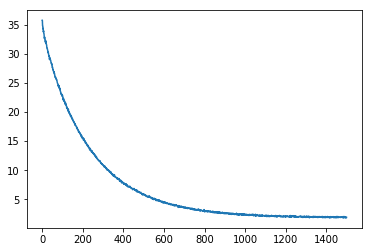

In [32]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of over 0.35 on the validation set.
from softmax_classifier import Softmax
import copy

# to save loss of best model
best_hist = []
# to save accuracy on validation set of best model
best_val = -1
# to save best model
best_logistic = None
best_lr = 0.0
best_reg = 0.0

learning_rates = [5e-7, 1e-6]
regularization_strengths = [1e2, 1e3, 1e4, 1e5]
# number of iterations to train
num_iters = 1500
# if true display informations about training
verbose = True

for lr in learning_rates:
    for reg in regularization_strengths:
        print("lr = {}, reg = {}".format(lr, reg))
        model = Softmax(random_seed=13)
        ################################################################################
        # TODO:                                                                        #
        # Write code that chooses the best hyperparameters by tuning on the validation #
        # set. For each combination of hyperparameters, train a model on the           #
        # training set, compute its accuracy on the training and validation sets, and  #
        # store the best validation accuracy in best_val and the model object that     #
        # achieves this accuracy in best_logistc.                                      #
        #                                                                              #
        # Hint: You should use a small value for num_iters as you develop your         #
        # validation code so that the model don't take much time to train; once you are#
        # confident that your validation code works, you should rerun the validation   #
        # code with a larger value for num_iters, lets say 1500.                       #
        #                                                                              #
        # To copy the model use best_model = copy.deepcopy(model)                      #
        ################################################################################
        loss, _ = model.train(X_train, y_train, lr, reg, num_iters)
        
        y_pred_train = model.predict(X_train)
        accuracy_train = np.mean(y_train == y_pred_train)
        
        y_pred_validation = model.predict(X_val)
        accuracy_validation = np.mean(y_pred_validation == y_val)
        
        if (accuracy_validation > best_val):
            best_val = accuracy_validation
            best_hist = loss
            best_model = copy.deepcopy(model)
        ################################################################################
        #                              END OF YOUR CODE                                #
        ################################################################################
        print("\r\t -> train acc = {:.3f}, val acc = {:.3f}".format(accuracy_train, accuracy_validation))


print('best validation accuracy achieved during cross-validation: {:.3f}'.format(best_val))
plt.plot(best_hist)
plt.show()

Now that we have the best model, we can test the accuracy on test set.

In [33]:
# evaluate on test set
# Evaluate the best softmax on test set
y_test_pred = best_model.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('Logistic on raw pixels final test set accuracy: {:.3f}'.format(test_accuracy))

Logistic on raw pixels final test set accuracy: 0.390


And finally visualizy the weights.

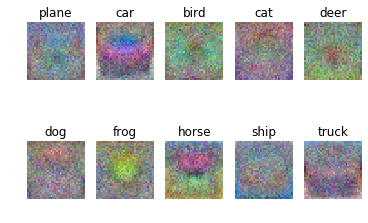

In [34]:
# Visualize the learned weights for each class
w = best_model.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)

w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])